https://www.youtube.com/watch?v=6Pzg-UY1VDg

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [21]:
data = pd.read_csv('nss57667.tsv', sep='\t', lineterminator='\n')
data['incident_count'] = 1
data.set_index('CPSC Case #')
data.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,incident_count
0,161243916,12/20/2016,38,16.1154,V,54,2,0,NaN,71,LEG WOUND,37,4,1,0,4057,NaN,54 YR OLD FEMALE FELL AND HIT HEAD ON TABLE AN...,N IT\r,1
1,161248239,12/18/2016,42,63.7429,L,17,2,1,NaN,54,NaN,92,1,1,0,1893,NaN,17YOF ACCIDENTAL SLAMMED INDOOR HOUSE DOOR ON ...,/CRUSHING INJURY FINGER\r,1
2,161245977,12/14/2016,10,4.5056,C,15,1,2,NaN,57,NaN,92,1,0,0,1205,NaN,15YOM SNATCHED A BASKETBALL AND JAMMED FINGER ...,\r,1
3,161255629,12/26/2016,98,85.2143,S,30,2,2,NaN,53,NaN,83,1,1,0,572,NaN,30 YOF WAS MOVING A TELEVISION AT HOME WHEN SH...,DX RT FOOT CONTUSION*\r,1
4,161242093,12/13/2016,20,4.5056,C,217,1,1,NaN,51,NaN,82,1,1,0,1682,1864.0,17MOM GRABBED HOT HAIR STRAIGHTNER OFF COUNTER...,\r,1


In [11]:
FIGSIZE = (8,5)
plt.rcParams['figure.figsize'] = FIGSIZE

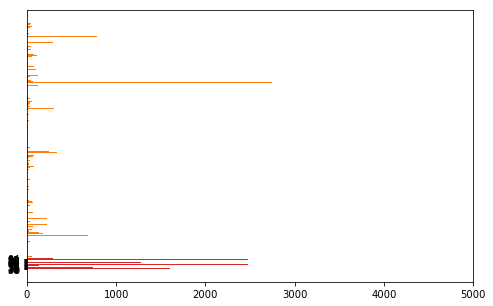

In [24]:
# What body part is injured most often?
prod_counts = data.groupby('body_part')['incident_count'].aggregate(np.sum)
plt.barh(bottom=list(range(len(prod_counts))), 
        width=prod_counts,
        tick_label=prod_counts.index)
plt.show()

## Seaborn

In [25]:
import seaborn as sns

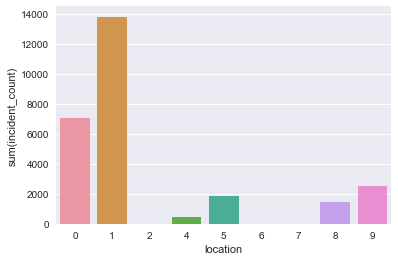

In [31]:
with sns.axes_style('darkgrid'):
    sns.barplot(data=data, x='location', y='incident_count', estimator=sum)
    sns.plt.show()

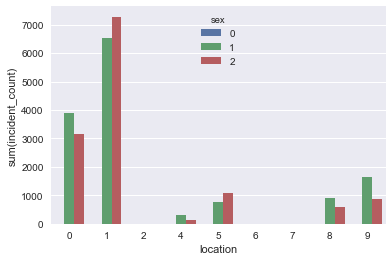

In [32]:
with sns.axes_style('darkgrid'):
    sns.barplot(data=data, x='location', y='incident_count', estimator=sum, hue='sex')
    sns.plt.show()

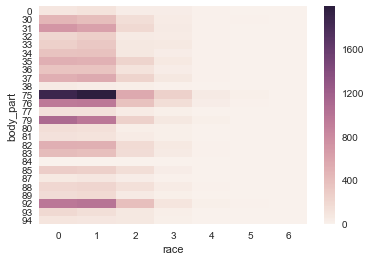

In [34]:
table = data.pivot_table(index='body_part', columns='race',
                        values='incident_count', aggfunc=len, fill_value=0)
sns.heatmap(table)
sns.plt.show()

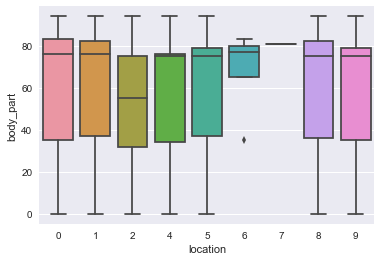

In [36]:
sns.boxplot(data=data, y='body_part', x='location')

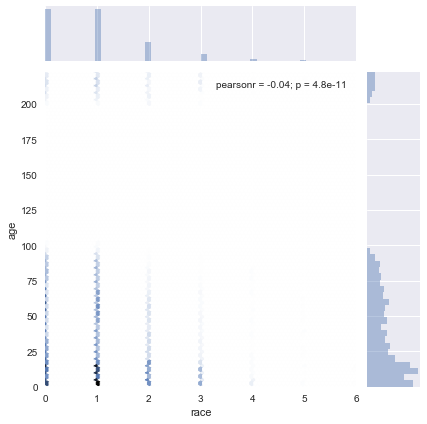

In [38]:
sns.jointplot(data=data, x='race', y='age', kind='hex')

## Bokeh

In [47]:
import bokeh
from bokeh.plotting import figure
from bokeh.io import output_notebook, output_file, show

In [42]:
data_sample = data.sample(200)
data_sample

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,incident_count
10357,161247899,12/15/2016,77,16.1154,V,37,1,0,NaN,53,NaN,31,1,0,0,557,4076.0,37YOM SUST CONT TO RIBS FALLING OUT OF BED AND...,\r,1
8859,161251548,12/12/2016,34,16.1154,V,22,2,2,NaN,71,PAIN,89,1,1,0,4010,NaN,22 YF HAS BEEN SLEEPING ON A NEW MATTRESS AND ...,PAIN\r,1
13906,161229330,12/10/2016,35,16.1154,V,59,1,0,NaN,71,PAIN,30,1,0,0,1842,1829.0,59YOM LOST HIS BALANCE ON THE STAIRS & STABILI...,N RAILING & NOW FEELS PAIN IN SHOULDER DX: ACU...,1
12179,161246239,12/21/2016,35,16.1154,V,12,1,0,NaN,71,PAIN,79,1,8,0,1267,1884.0,12YOM WAS PLAYING INDOOR SOCCER AT SCHOOL WHEN...,E WALL DX: ABDOMINAL & RIGHT SHOULDER PAIN\r,1
23397,161215229,12/05/2016,21,16.1154,V,65,2,0,NaN,62,NaN,75,4,1,0,281,NaN,65YF SYNCOPED&FELL ?HITTING HEAD WHILE TAKING ...,N ON THXGIVING DAY SINCE THEN C WORSENING H/A>...,1
10557,161237100,12/15/2016,35,16.1154,V,12,1,0,NaN,71,INJURY,37,1,8,0,1267,NaN,12YOM WAS PLAYING SOCCER WHEN HIS ANKLE WAS ST...,R PLAYER IN GAME AT SCHOOL DX: LEFT ANKLE INJU...,1
1046,170121808,12/24/2016,90,4.5056,C,214,2,1,NaN,59,NaN,76,1,1,0,4025,NaN,14MOF-PT WAS CLIMBING ON A BAR STOOL FELL OFF...,SUSTANING A LACERATION. DX- 1CM CHIN LACEARTIO...,1
20014,161257096,12/16/2016,95,16.1154,V,41,2,1,NaN,53,NaN,31,1,1,0,611,NaN,LEFT CWC. 41 YOF SLIPPED AND FELL IN THE BATHTUB.,\r,1
13851,161239473,12/18/2016,21,16.1154,V,52,2,0,NaN,57,NaN,35,4,5,0,1738,NaN,52YF WALKING OUT OF *** TRIPPED ON A DISPLAY&F...,>>PATELLAR FX\r,1
24894,170100392,12/25/2016,7,85.2143,S,75,2,0,NaN,71,BURSITIS,30,1,1,0,1415,NaN,75 Y O F BURSITIS OF SHOULDER SINCE SHOVELING ...,\r,1


In [49]:
p = figure(width=400, height=300)
p.circle(data_sample['race'], data_sample['age'], size=10, alpha=0.7)
output_notebook()
show(p)

Loading BokehJS ...

AttributeError: 'Settings' object has no attribute 'perform_document_validation'